## Final Project Team Cedar, Fall 2022

### CoverMyMeds

### Data Exploration

Our dataset is a simulated dataset of claims billing transactions, provided by CoverMyMeds. In this notebook we explore the dataset, calculate descriptive statistics, and generate data visualizations to describe and understand the dataset and relationships between the variables.

First load packages:

In [2]:
# import packages needed for this notebook here
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Then import the data:

In [3]:
# load the data here
rx = pd.read_csv('./data/pharmacy_tx.csv')

Our dataset consists of 9 columns:

In [4]:
rx.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00


The columns include the following variables:
* tx_date – The date on which the pharmacy transaction was attempted
* pharmacy – The particular pharmacy where the transaction was attempted
* diagnosis – The diagnosis of the patient associated with the transaction
* drug – The drug that the patient was prescribed that the pharmacy is attempting to bill
* bin – The broadest identifier of a patient’s insurance plan (banking identification number)
* pcn – An identifier that more narrowly specifies a plan underneath the broader “bin”
* group – Another identifier that more narrowly specifies a plan underneath the broader “bin”
* rejected – Whether the billing transaction was rejected by the plan
* patient_pay – The amount of copayment for which the patient is responsible

In [6]:
rx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910244 entries, 0 to 13910243
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   drug         object 
 4   bin          int64  
 5   pcn          object 
 6   group        object 
 7   rejected     bool   
 8   patient_pay  float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 862.3+ MB


Overall, the dataset includes close to 14 million observations.

We first check for NAs/missing values:

In [7]:
rx.isnull().sum()

tx_date              0
pharmacy             0
diagnosis            0
drug                 0
bin                  0
pcn            3626961
group          3909025
rejected             0
patient_pay          0
dtype: int64

Only the variables "pcn" and "group" have null values, which makes sense, since these are lower-level classifications of a patient's insurance, which may not always be available. However, we need to be conscious of these missing values for our models. Our models need to either be fine with missing values or we need to drop the observations that contain them. 

An important feature in our dataset that is relevant for our goals of predicting prescription medication acceptance and co-pay is the column "rejected." This column tells us if the transaction was accepted by insurance. 

How many of our transactions are accepted (rejected == False) and how many are rejected (rejected == True)?

In [9]:
rx['rejected'].value_counts()

False    12823384
True      1086860
Name: rejected, dtype: int64

In [11]:
rx['rejected'].value_counts(normalize=True).mul(100).round(3).astype(str)+' %'

False    92.187 %
True      7.813 %
Name: rejected, dtype: object

Most of the transactions in our dataset (92.19%) are accepted, with only 7.81% being rejected. This is good news for patients, but something we need to keep in mind when creating train/test splits of our dataset. 

What about the other columns in our dataset? Many of them are categorical (pharmacy, diagnosis, drug, bin, pcn, group), so create special challenges when it comes to modeling. Let's understand how many unique entries exist in each of the categorical variables in our dataset and how they are distributed across the dataset:

In [13]:
rx['pharmacy'].nunique()

58

In [22]:
rx['pharmacy'].value_counts(normalize=True).mul(100).round(2).astype(str)+' %'

Pharmacy #24    1.89 %
Pharmacy #52    1.87 %
Pharmacy #39    1.83 %
Pharmacy #10    1.81 %
Pharmacy #5     1.81 %
Pharmacy #6      1.8 %
Pharmacy #17     1.8 %
Pharmacy #28     1.8 %
Pharmacy #11    1.79 %
Pharmacy #12    1.79 %
Pharmacy #9     1.78 %
Pharmacy #4     1.78 %
Pharmacy #44    1.78 %
Pharmacy #33    1.78 %
Pharmacy #16    1.77 %
Pharmacy #29    1.77 %
Pharmacy #1     1.75 %
Pharmacy #15    1.75 %
Pharmacy #36    1.75 %
Pharmacy #31    1.75 %
Pharmacy #19    1.74 %
Pharmacy #48    1.74 %
Pharmacy #53    1.74 %
Pharmacy #2     1.73 %
Pharmacy #30    1.73 %
Pharmacy #54    1.73 %
Pharmacy #51    1.73 %
Pharmacy #0     1.73 %
Pharmacy #46    1.72 %
Pharmacy #27    1.72 %
Pharmacy #43    1.71 %
Pharmacy #40    1.71 %
Pharmacy #37    1.71 %
Pharmacy #45    1.71 %
Pharmacy #8     1.71 %
Pharmacy #42    1.71 %
Pharmacy #35    1.71 %
Pharmacy #3     1.71 %
Pharmacy #55     1.7 %
Pharmacy #49     1.7 %
Pharmacy #57     1.7 %
Pharmacy #23    1.69 %
Pharmacy #26    1.68 %
Pharmacy #4

There are 58 unique pharmacies in our dataset and they are very evenly distributed across the dataset. 

In [200]:
rx['bin'].nunique()

12

In [201]:
rx['bin'].value_counts(normalize=True).mul(100).round(2).astype(str)+' %'

664344    27.72 %
322463    18.28 %
725700     15.1 %
691847     9.52 %
757349      6.9 %
96934      6.26 %
571569     5.57 %
539437     3.72 %
956971     1.96 %
160389     1.88 %
718350     1.84 %
756120     1.25 %
Name: bin, dtype: object

The dataset includes 12 different insurance plans, which vary in how frequently they appear in the dataset. 

In [25]:
rx['diagnosis'].nunique()

133

In [28]:
rx['diagnosis'].value_counts(normalize=True).mul(100).round(4).astype(str)+' %'

I68.27    15.7665 %
G99.93     9.9639 %
K32.86     9.2898 %
Q85.91     5.5742 %
W50.87     5.1674 %
            ...    
Y08.66     0.0002 %
G27.20     0.0002 %
N33.46     0.0001 %
X00.63     0.0001 %
J65.04     0.0001 %
Name: diagnosis, Length: 133, dtype: object

There are 133 unique diagnoses in our dataset, but some are very rare. We may also be able to reduce the number of unique categories by considering only the broad diagnosis (first three digits). Let's break this column up into two separate columns, one for the broad diagnosis and one for the specific diagnosis:

In [29]:
rx[["diagnosis_broad","diagnosis_specific"]] = rx['diagnosis'].str.split(".",expand=True)

In [30]:
rx['diagnosis_broad'].value_counts(normalize=True).mul(100).round(4).astype(str)+' %'

I68    15.7665 %
G99     9.9639 %
K32     9.2898 %
Q85     5.5742 %
W50     5.1674 %
         ...    
G27     0.0002 %
Y08     0.0002 %
N33     0.0001 %
X00     0.0001 %
J65     0.0001 %
Name: diagnosis_broad, Length: 129, dtype: object

Unfortunately, this split does not actually reduce the complexity of this variable in our dataset. Most of the broad diagnosis codes were unique, so splitting this column up does not accomplish any meaningful reduction. 

In [23]:
rx['drug'].nunique()

114

In [24]:
rx['drug'].unique()

array(['branded tanoclolol', 'branded oxasoted', 'branded cupitelol',
       'generic oxasoted', 'branded mamate', 'branded lalol',
       'branded foxivelule', 'generic foxivelule',
       'generic tafistitrisin', 'branded prazinib', 'generic momudobatin',
       'branded gentipapavir', 'branded cibroniudosin',
       'generic prazinib', 'branded rulfalol', 'generic keglusited',
       'branded pucomalol', 'generic tanoclolol', 'generic pucomalol',
       'generic cupitelol', 'branded glycontazepelol',
       'branded glycogane', 'generic cicrochoric', 'generic rulfalol',
       'branded satrade', 'branded tovane', 'generic suvinicuvir',
       'branded semufolic', 'branded sorine', 'generic ratin',
       'generic hozirol', 'generic glycontazepelol', 'branded dienulol',
       'generic hivir', 'branded diadaric', 'branded mule',
       'branded tocilic', 'generic cibroniudosin', 'branded gorol',
       'generic tovane', 'generic simarol', 'generic gorol',
       'generic vocopirin', 

There are 114 unique drugs in our dataset, but note that some of the entries are just branded and generic versions of the same drug. Co-pay likely varies between generic and branded versions of the same drug, so we should split this column up into two separate columns, one with brand status (branded vs. generic) and one with the drug name. 

In [31]:
 rx[["drug_type","drug_name"]] = rx['drug'].str.split(" ",expand=True)

In [32]:
rx.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,diagnosis_broad,diagnosis_specific,drug_type,drug_name
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,G99,93,branded,tanoclolol
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,U60,52,branded,oxasoted
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,Q85,91,branded,cupitelol
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,U60,52,generic,oxasoted
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,N55,01,branded,mamate


In [33]:
rx['drug_name'].value_counts(normalize=True).mul(100).round(4).astype(str)+' %'

prazinib        12.3057 %
rulfalol         5.1653 %
pucomalol        4.0004 %
mule             3.9063 %
tanoclolol       3.6902 %
                  ...    
dusin            0.0689 %
sizubesin        0.0584 %
gohevitravir     0.0296 %
lehydrome        0.0184 %
nenizevir         0.008 %
Name: drug_name, Length: 77, dtype: object

There are 77 different drugs in our dataset. Of all the drugs in our dataset, the breakdown between generic and branded is as follows:

In [34]:
rx['drug_type'].value_counts(normalize=True)

branded    0.628222
generic    0.371778
Name: drug_type, dtype: float64

Roughly two-thirds of the drugs in our dataset are branded, while roughly one-third is generic.
##### Is there a difference in how often branded vs. generic drug claims are rejected? 

In [35]:
rx['rejected'].groupby(rx['drug_type']) \
.value_counts(normalize=True). \
rename('frequency').to_frame() \
.reset_index()

,drug_type,rejected,frequency
0,branded,False,0.878314
1,branded,True,0.121686
2,generic,False,0.995461
3,generic,True,0.004539


Remember that the overall rejection rate in our dataset is 7.81% (92.19% acceptance). From this we see that branded drugs are rejected more frequently and only have a 87.83% acceptance rate, compared to generic drugs which have a 99.55% acceptance rate. This suggests that "rejected" may be an important variable to include in our models. 

What about rejection/acceptance rates of different drugs (ignoring brandedness)? 
##### Are some drugs rejected more frequently than others? 

In [116]:
drug_acceptance_rates = rx['rejected'].groupby(rx['drug_name']).value_counts(normalize=True).\
                        rename('frequency').to_frame().reset_index()

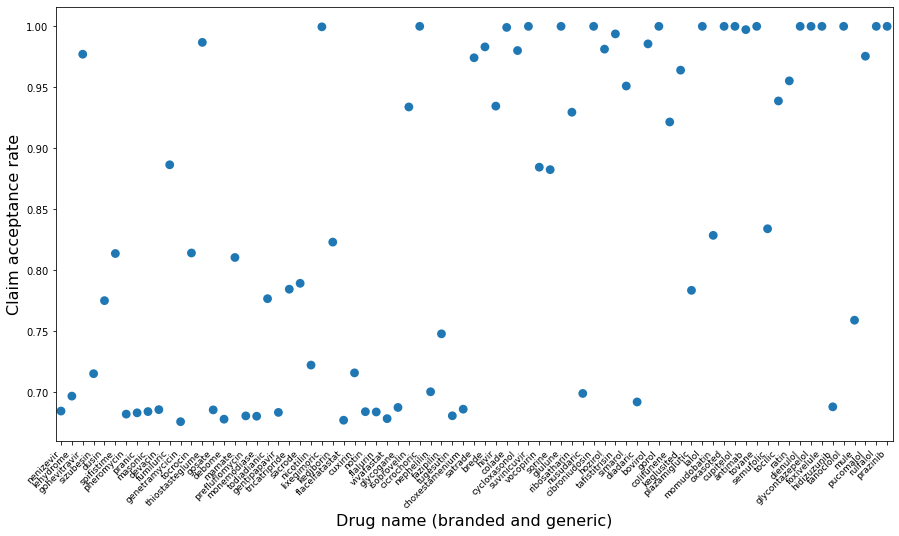

In [114]:
plt.figure(figsize=(15,8))

my_order = rx['drug_name'].value_counts().iloc[::-1].index
df = drug_acceptance_rates[drug_acceptance_rates['rejected']==False]

fig = sns.pointplot(data = df,
                      x = 'drug_name',
                      y = 'frequency', 
                      order = my_order, 
                      join = False)

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.xlabel("Drug name (branded and generic)", fontsize=16)
plt.ylabel("Claim acceptance rate", fontsize=16)

plt.show()


We have sorted this plot by how frequently the drug appears in the dataset (rare to common, from left to right). Some drugs are rejected more frequently than others and there seems to be some relationship between a lower acceptance rate and the drug not being very commonly prescribed, but this could just be due to a smaller sample size. There is certainly variation in acceptance rate throughout the dataset. 

We saw above that branded medications are rejected more frequently than generic medications. Let's take a closer look at this relationship. Are branded medications often rejected when a generic option is available? Or also when they are the only option?

In [123]:
# creating a dataframe with rejection rates by drug, then split by brandedness
drug_acceptance_rates = rx['rejected'].groupby(rx['drug']).value_counts(normalize=True).\
                        rename('frequency').to_frame().reset_index()
drug_acceptance_rates = drug_acceptance_rates[drug_acceptance_rates['rejected']==False]
drug_acceptance_rates[["drug_type","drug_name"]] = drug_acceptance_rates['drug'].str.split(" ",expand=True)

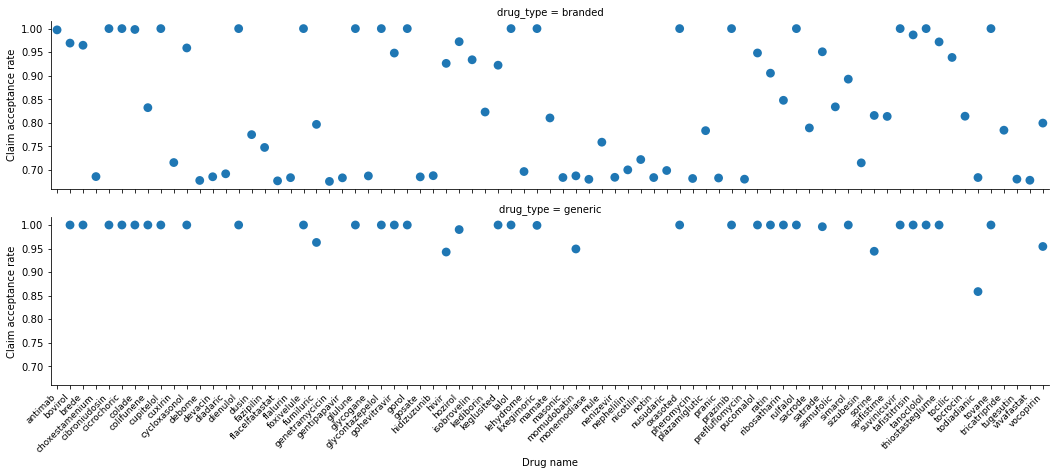

In [122]:
fig = sns.catplot(data = drug_acceptance_rates,
                  x = 'drug_name',
                  y = 'frequency',
                  kind = "point",
                  join = False,
                  row = 'drug_type',
                  aspect=5, height=3)

fig.set_xticklabels(fontsize=9, rotation=45, horizontalalignment='right')
fig.set_axis_labels("Drug name", "Claim acceptance rate")

plt.show()

Acceptance rates for branded drugs are often low even when no generic alternative appears to be available (at least based on our dataset). 

#### What about cost? 

In [38]:
rx.groupby(by='rejected').mean('patient_pay')

,bin,patient_pay
rejected,,
False,573854.059374,26.09971
True,565839.226983,0.00000


Interestingly, the patient co-pay for rejected transactions in our dataset is always $0. This could be because the patient left without receiving their medication or because co-pay just wasn't recorded here, because the insurance company covered none of the cost, so there technically was no "co"-pay. Either way, it is something that we need to consider when predicting patient co-pays. 

Since rejected transactions are not going to be informative for understanding patient co-pays, let's break our dataset up and create a version that only includes the accepted transactions:

In [39]:
rx_accepted = rx[rx["rejected"] == False]

In [42]:
rx_accepted.shape

(12823384, 13)

This dataset of only accepted transactions has 12.8 million observations. Let's explore the cost of prescription medications for the patient.

##### Do co-pays vary across the year? 

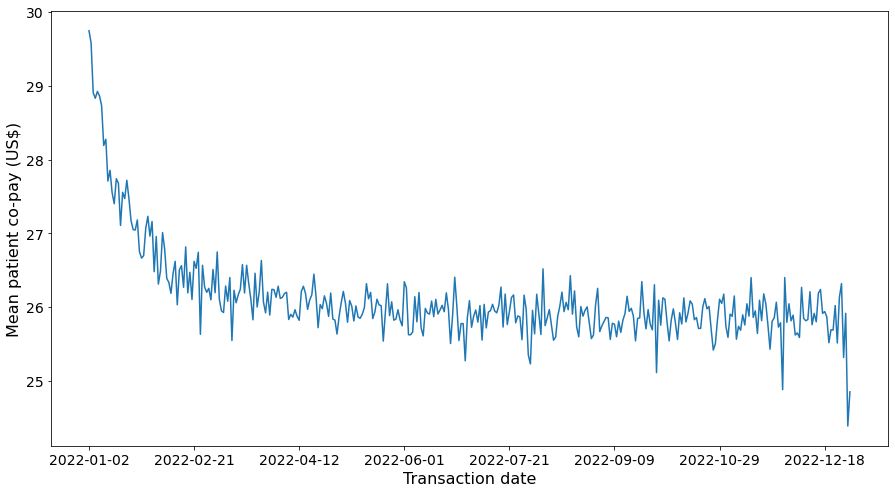

In [47]:
plt.figure(figsize=(15,8))

rx_accepted.groupby(rx_accepted['tx_date'])["patient_pay"].mean().plot()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Transaction date", fontsize=16)
plt.ylabel("Mean patient co-pay (US$)", fontsize=16)

plt.show()

Mean co-pays are higher at the beginning of the year, possibly because patients have not hit any deductibles yet. 

##### Do co-pays vary between branded vs. generic drugs? 

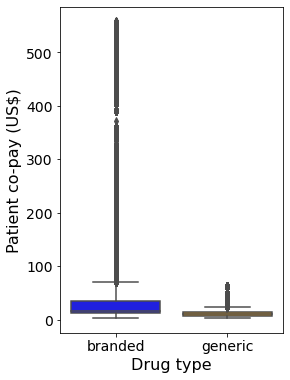

In [46]:
plt.figure(figsize=(4,6))

sns.boxplot(data=rx_accepted,
               x = 'drug_type',
               y = 'patient_pay',
            palette=['blue', 'orange'])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Drug type", fontsize=16)
plt.ylabel("Patient co-pay (US$)", fontsize=16)

plt.show()

Branded drugs tend to have higher co-pays than generic drugs and also have a much longer tail of very expensive drugs. 

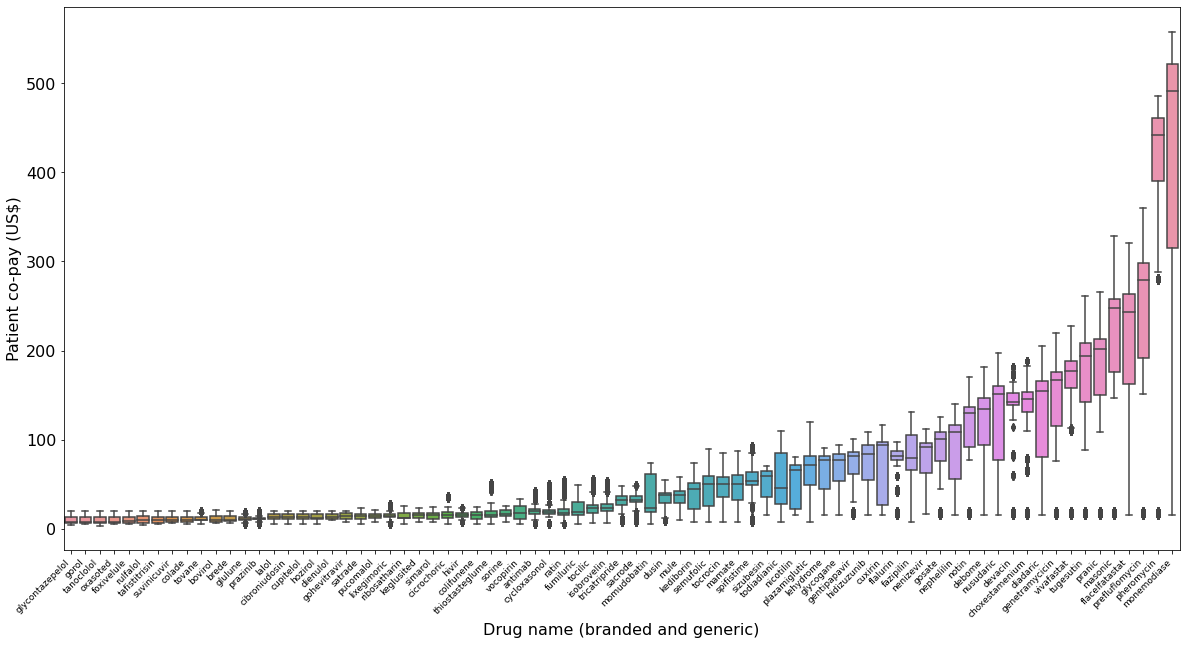

In [60]:
plt.figure(figsize=(20,10))

# order drugs by mean price for a nicer looking plot
my_order = rx_accepted.groupby(by=["drug_name"])["patient_pay"].mean().sort_values().index

fig = sns.boxplot(data=rx_accepted,
               x = 'drug_name',
               y = 'patient_pay',
                 order = my_order)

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.xlabel("Drug name (branded and generic)", fontsize=16)
plt.ylabel("Patient co-pay (US$)", fontsize=16)

plt.show()

Some drugs are clearly much more expensive for the patient than others. But is this because some drugs are only available as branded versions? Maybe splitting the plot up into a generic and a branded facet would provide some insight.

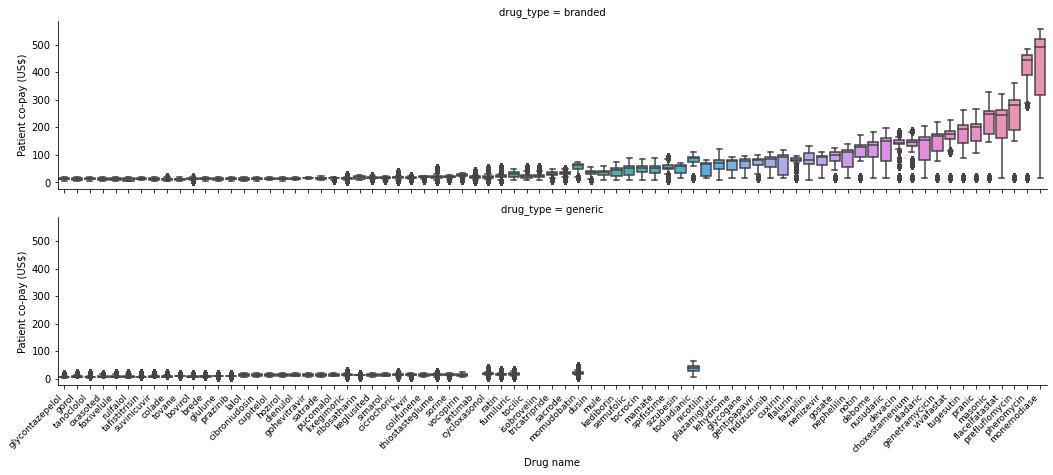

In [61]:
fig = sns.catplot(data = rx_accepted,
                  x = 'drug_name',
                  y = 'patient_pay',
                  kind = "box",
                  row = 'drug_type',
                  order = my_order,
                  aspect=5, height=3)

fig.set_xticklabels(fontsize=9, rotation=45, horizontalalignment='right')
fig.set_axis_labels("Drug name", "Patient co-pay (US$)")

plt.show()

Yes, it looks like some drugs are only available as branded versions and are therefore much more expensive for the patient. 

#### Diagnosis

Let's explore whether diagnosis appears to be related to drug rejection rates and/or patient co-pays. 

##### Acceptance rates by diagnosis

In [128]:
drug_acceptance_rates = rx['rejected'].groupby(rx['diagnosis']).value_counts(normalize=True).\
                        rename('frequency').to_frame().reset_index()

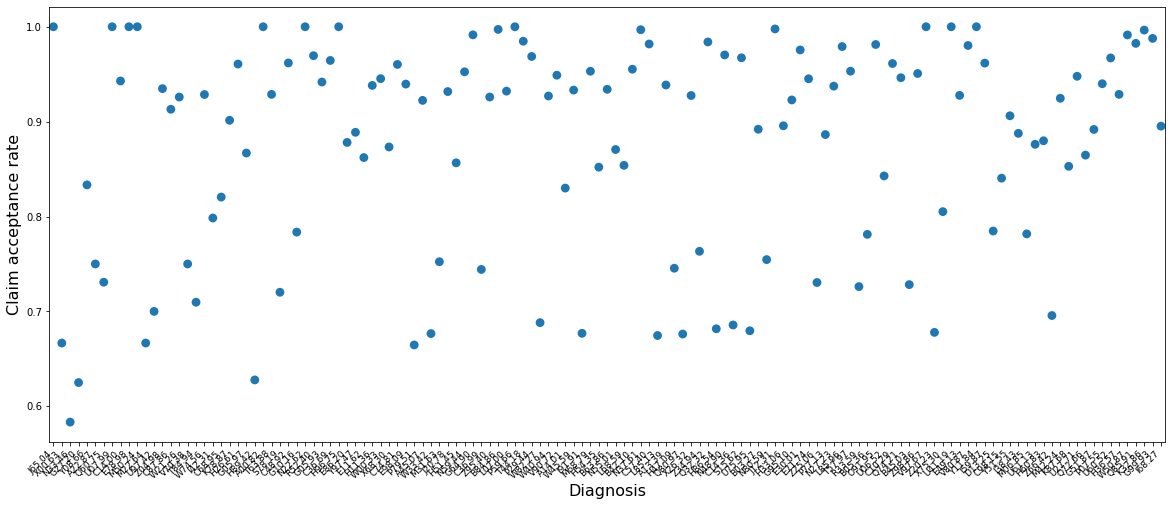

In [127]:
plt.figure(figsize=(20,8))

my_order = rx['diagnosis'].value_counts().iloc[::-1].index
df = drug_acceptance_rates[drug_acceptance_rates['rejected']==False]

fig = sns.pointplot(data = df,
                      x = 'diagnosis',
                      y = 'frequency', 
                      order = my_order, 
                      join = False)

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.xlabel("Diagnosis", fontsize=16)
plt.ylabel("Claim acceptance rate", fontsize=16)

plt.show()

We have sorted this plot from left to right by how frequently the diagnosis appears in the dataset, but there does not seem to be a relationship between how common a diagnosis is and the acceptance rate of the medication prescribed for it. There is, however, variation in the acceptance rates between different diagnoses. 

##### Cost by diagnosis

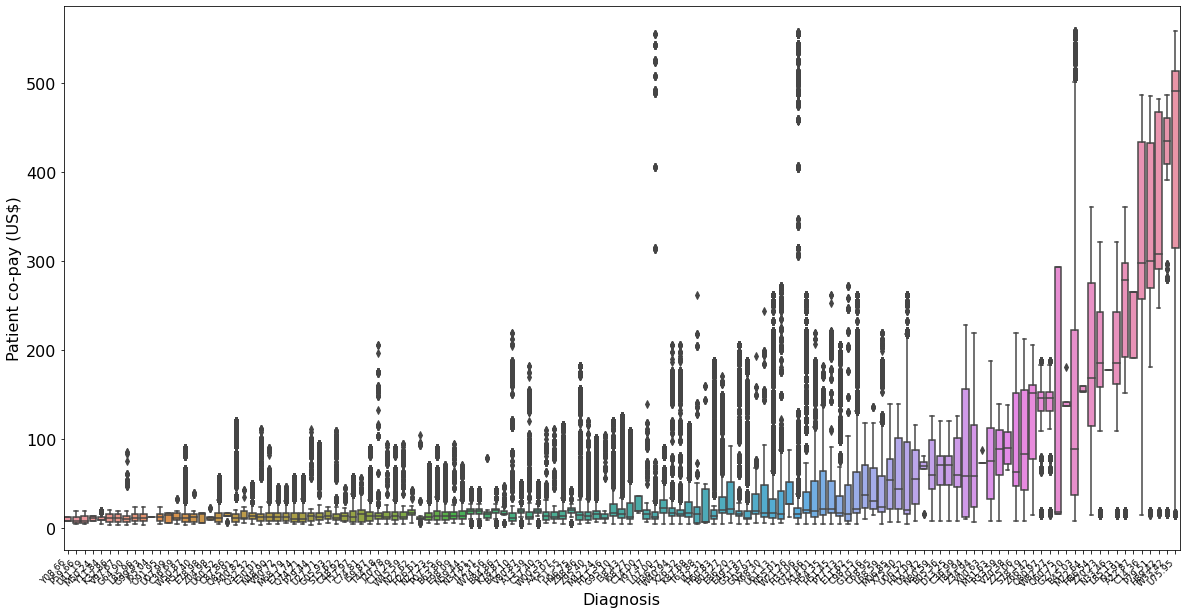

In [129]:
plt.figure(figsize=(20,10))

# order drugs by mean price for a nicer looking plot
my_order = rx_accepted.groupby(by=["diagnosis"])["patient_pay"].mean().sort_values().index

fig = sns.boxplot(data=rx_accepted,
               x = 'diagnosis',
               y = 'patient_pay',
                 order = my_order)

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.yticks(fontsize=16)
plt.xlabel("Diagnosis", fontsize=16)
plt.ylabel("Patient co-pay (US$)", fontsize=16)

plt.show()

Co-pays are much higher for some diagnoses than others, but is this because more expensive medications are prescribed for these conditions? 

Let's explore the relationship between diagnosis and the drug(s) prescribed for it.

In [130]:
df = rx.copy()
df = df.sort_values(by='diagnosis')
df['diagnosis_number'] = df['diagnosis'].factorize()[0]
df['drug_number'] = df['drug_name'].factorize()[0]

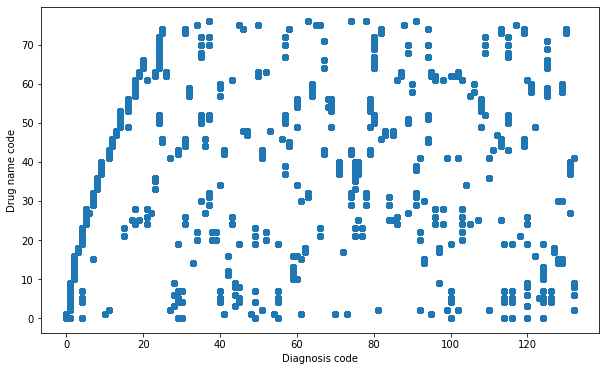

In [132]:
plt.figure(figsize=(10,6))

plt.scatter(df['diagnosis_number'],df['drug_number'])
plt.ylabel('Drug name code')
plt.xlabel('Diagnosis code')

plt.show()

As expected, there is a correlation between diagnosis and the drug prescribed for it, but it also shows that this is not a one-to-one relationship. Some diagnoses have multiple drugs and some drugs are prescribed for multiple uses. Let's dig into this a little bit more. 

In [154]:
drugs_per_diagnosis = rx['drug_name'].groupby(rx['diagnosis']).nunique().\
                        sort_values().rename('ndrugs').to_frame().reset_index()

uses_per_drug = rx['diagnosis'].groupby(rx['drug_name']).nunique().\
                        sort_values().rename('uses').to_frame().reset_index()

In [166]:
print(drugs_per_diagnosis['ndrugs'].median())
print(drugs_per_diagnosis['ndrugs'].mean())

print(uses_per_drug['uses'].median())
print(uses_per_drug['uses'].mean())

3.0
3.81203007518797
6.0
6.584415584415584


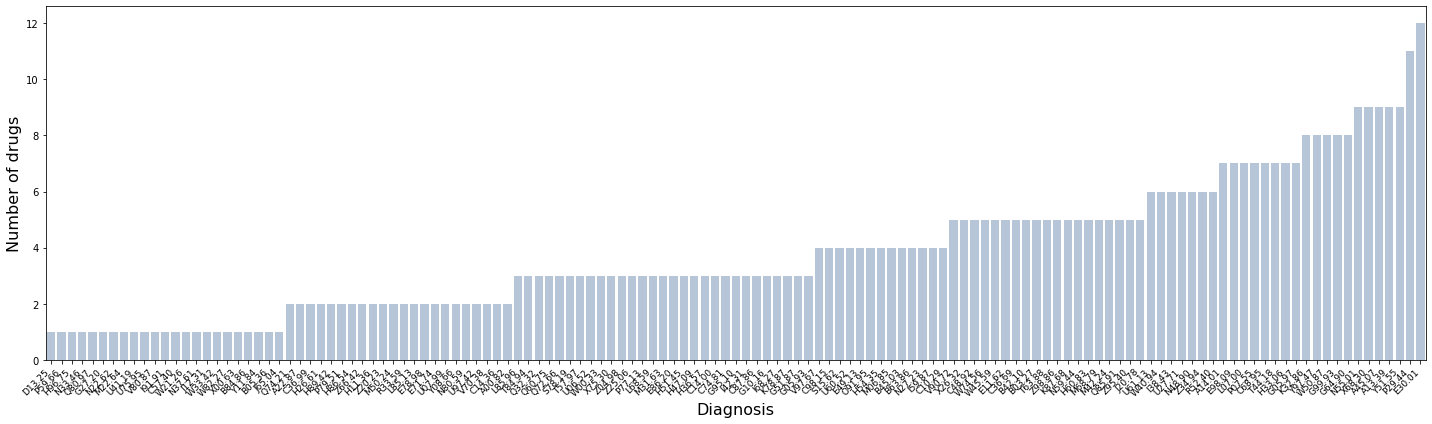

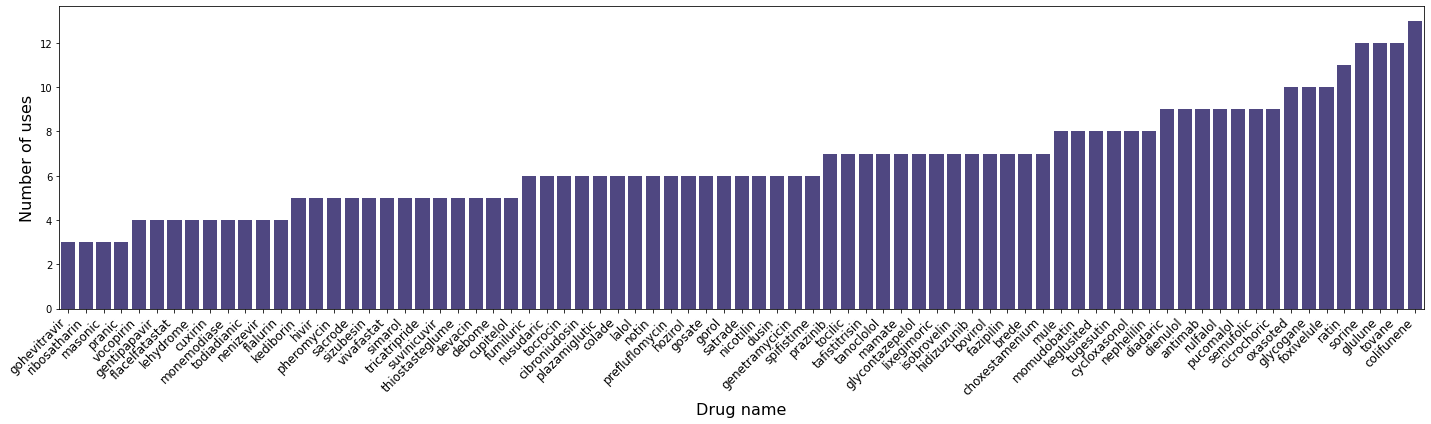

In [164]:
# plot: drug name by number of unique diagnoses, and diagnoses by number of unique drugs
plt.figure(figsize=(20,6))

fig1 = sns.barplot(data = drugs_per_diagnosis,
             x = 'diagnosis',
             y = 'ndrugs',
                  color = 'lightsteelblue')

fig1.set_xticklabels(fig1.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.xlabel("Diagnosis", fontsize=16)
plt.ylabel("Number of drugs", fontsize=16)
plt.show()

plt.figure(figsize=(20,6))
fig2 = sns.barplot(data = uses_per_drug,
             x = 'drug_name',
             y = 'uses',
                  color = 'darkslateblue')

fig2.set_xticklabels(fig2.get_xticklabels(), fontsize=12, rotation=45, horizontalalignment='right')
plt.xlabel("Drug name", fontsize=16)
plt.ylabel("Number of uses", fontsize=16)

plt.show()

The majority of diagnoses have more than one drug that can be prescribed (median = 3.0, mean = 3.81) and all drugs have more than one diagnosis for which they can be prescribed (median = 6.0, mean = 6.58). 

#### Pharmacy

Do the different pharmacies in the dataset differ in their acceptance/rejection rates and/or their co-pays? We explore this in order to decide whether pharmacy is a meaningful variable to include in the models. 

##### Acceptance rates by pharmacy

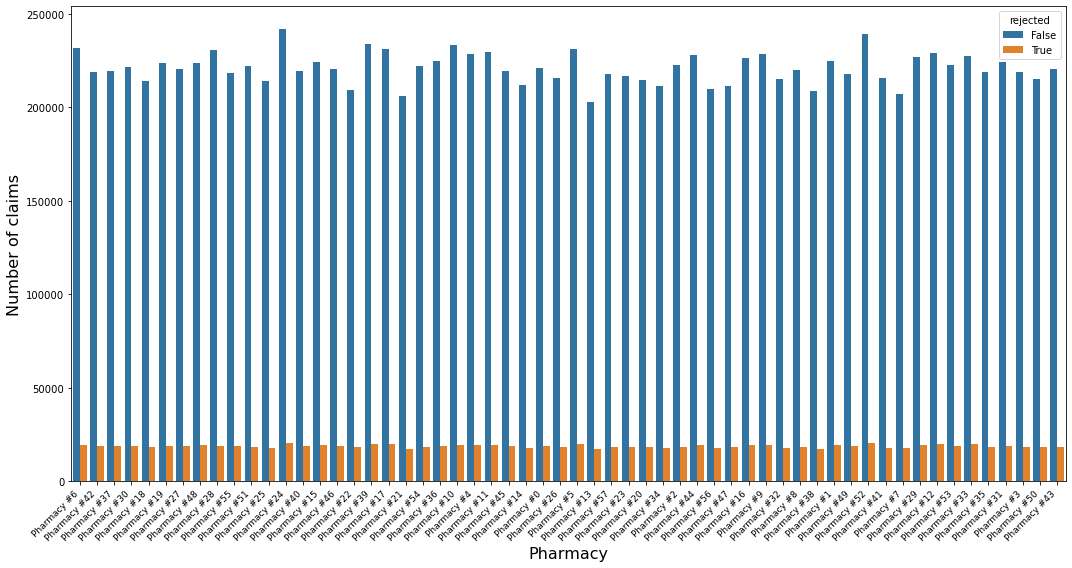

In [169]:
plt.figure(figsize=(15,8))

fig = sns.countplot(data = rx,
                      x = 'pharmacy', 
                      hue = 'rejected')

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.xlabel("Pharmacy", fontsize=16)
plt.ylabel("Number of claims", fontsize=16)

plt.show()

Number of rejections and acceptances are very evenly distributed across the different pharmacies, so pharmacy does not appear to be an informative variable to include in our models for predicting rejection rates. 

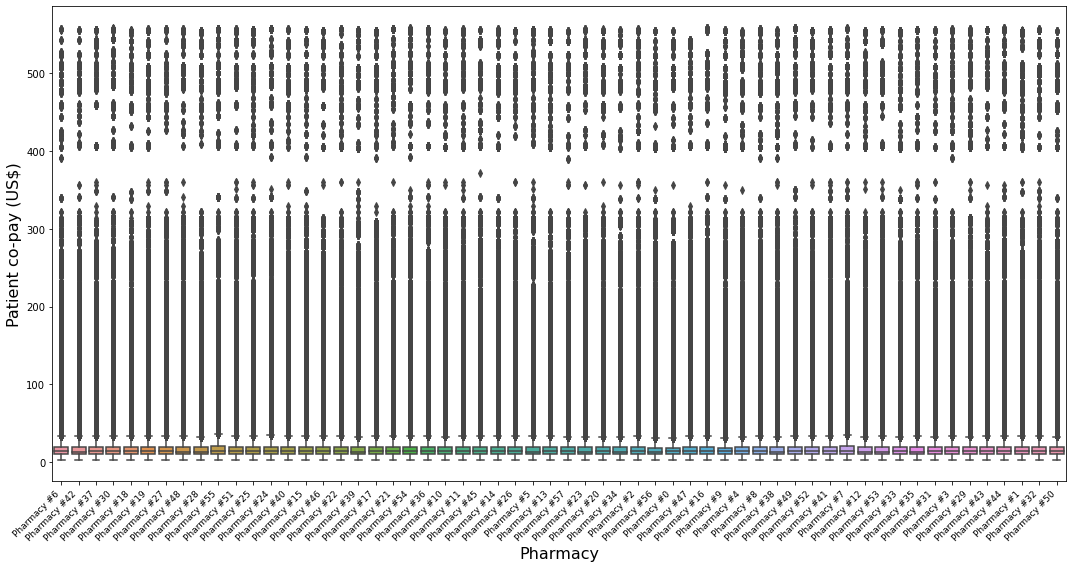

In [170]:
plt.figure(figsize=(15,8))

fig = sns.boxplot(data = rx_accepted,
                      x = 'pharmacy', 
                      y = 'patient_pay')

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.xlabel("Pharmacy", fontsize=16)
plt.ylabel("Patient co-pay (US$)", fontsize=16)

plt.show()

Patient co-pays also do not vary by pharmacy, so it does not look like pharmacy is a meaningful variable to include in models predicting a patient's co-payment. 

#### Insurance

A patient's insurance may impact how much their co-payment will be and potentially also whether a drug claim will be accepted or rejected. We are focusing on the broadest insurance category here (banking insurance number or 'bin'), because it is the only insurance variable that is available for all transactions. 

##### Does acceptance/rejection vary by insurance plan?

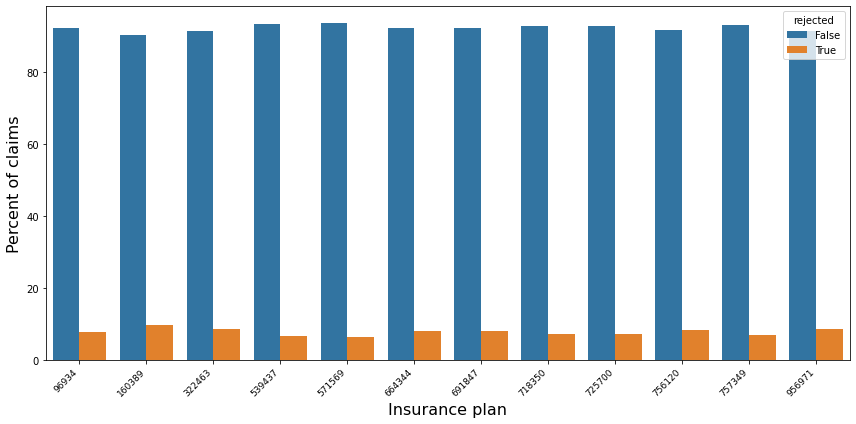

In [184]:
plt.figure(figsize=(12,6))

df = (rx.groupby('bin')['rejected']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

fig = sns.barplot(data = df, x = 'bin', y = 'percent', hue = 'rejected')

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.xlabel("Insurance plan", fontsize=16)
plt.ylabel("Percent of claims", fontsize=16)


plt.show()

Acceptance and rejection rates appear to be very even between the different insurance plans, so this is likely not a meaningful variable for predicting acceptance/rejection rates. 

##### Does co-pay vary by insurance plan?

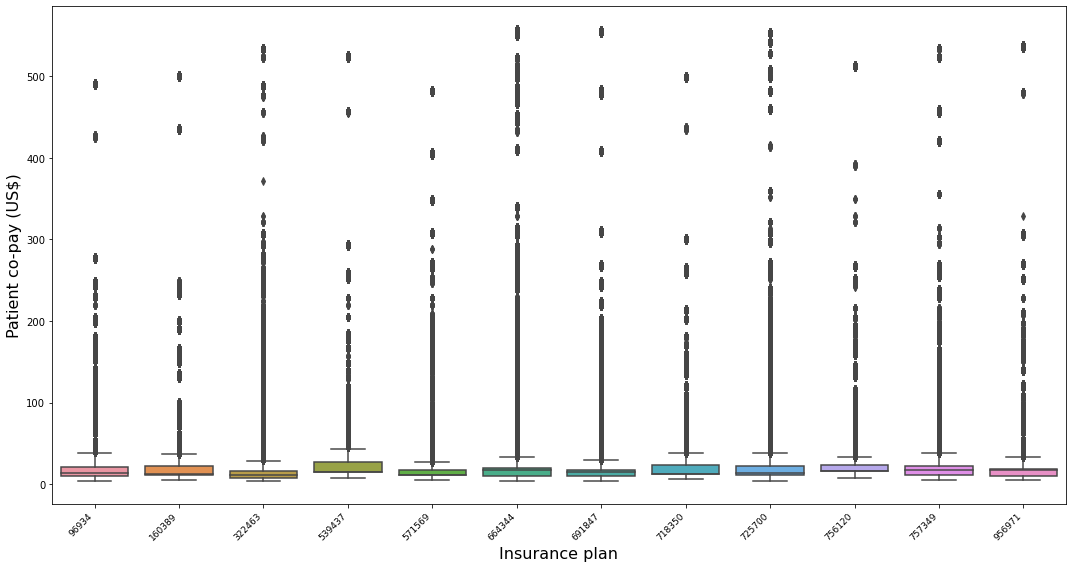

In [185]:
plt.figure(figsize=(15,8))

fig = sns.boxplot(data = rx_accepted,
                      x = 'bin', 
                      y = 'patient_pay')

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.xlabel("Insurance plan", fontsize=16)
plt.ylabel("Patient co-pay (US$)", fontsize=16)

plt.show()

There could be some variation in mean co-pay between insurance plans, but it is difficult to see because of the skew in the data. Let's take a closer look by reducing the y-axis and sorting the x-axis by mean co-pay:

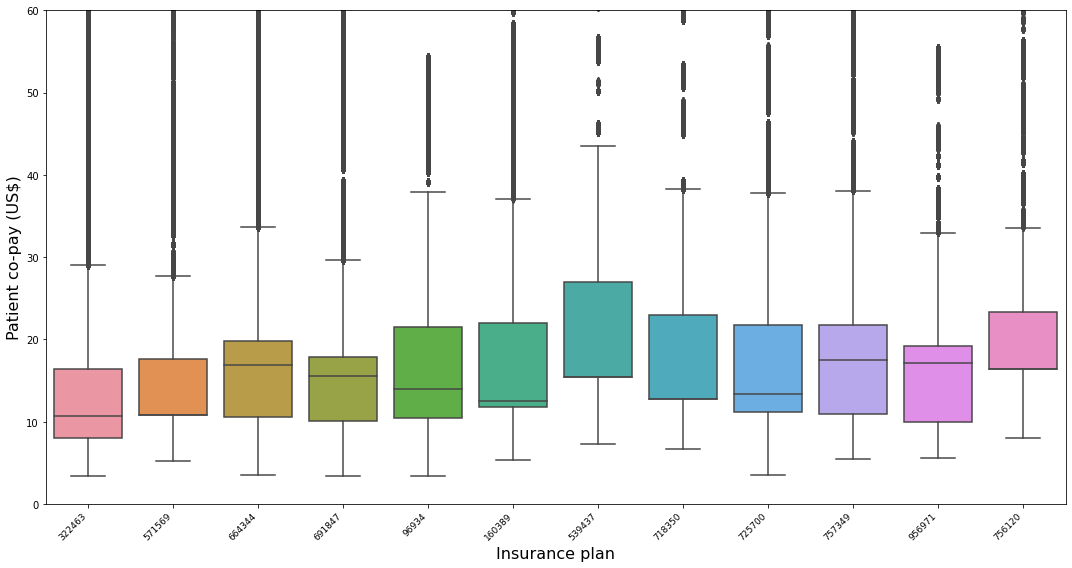

In [189]:
plt.figure(figsize=(15,8))

my_order = rx_accepted.groupby(by=["bin"])["patient_pay"].mean().sort_values().index

fig = sns.boxplot(data = rx_accepted,
                      x = 'bin', 
                      y = 'patient_pay',
                      order = my_order)

fig.set(ylim=(0, 60))

fig.set_xticklabels(fig.get_xticklabels(), fontsize=9, rotation=45, horizontalalignment='right')
plt.xlabel("Insurance plan", fontsize=16)
plt.ylabel("Patient co-pay (US$)", fontsize=16)

plt.show()

Co-pay seems to vary somewhat by insurance plan, so it could be worth including it in a model predicting patient co-pays. However, it may not be as strong a predictor as drug type or drug name, based on the plots we have seen above. 